In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

warnings.filterwarnings("ignore") # specify to ignore warning messages


In [2]:
df = pd.read_csv('Apartment_List_Rent_Estimates_CBSA_2021_6.csv')
df.shape

(1098, 58)

In [3]:
df.head()

,CBSA_Name,FIPS_Code,Population,Bedroom_Size,2017_01,2017_02,2017_03,2017_04,2017_05,2017_06,2017_07,2017_08,2017_09,2017_10,2017_11,2017_12,2018_01,2018_02,2018_03,2018_04,2018_05,2018_06,2018_07,2018_08,2018_09,2018_10,2018_11,2018_12,2019_01,2019_02,2019_03,2019_04,2019_05,2019_06,2019_07,2019_08,2019_09,2019_10,2019_11,2019_12,2020_01,2020_02,2020_03,2020_04,2020_05,2020_06,2020_07,2020_08,2020_09,2020_10,2020_11,2020_12,2021_01,2021_02,2021_03,2021_04,2021_05,2021_06
0,"Abilene, TX",10180.0,170009.0,_Overall,978.00,982.00,1018.00,1041.00,1020.00,1015.00,994.00,988.00,973.00,998.00,1005.00,995.00,982.00,961.00,984.00,964.00,977.00,974.00,988.00,989.00,974.00,977.00,980.00,993.00,992.00,1001.00,1017.00,1041.00,1066.00,1080.00,1092.00,1093.00,1085.00,1070.00,1059.00,1058.00,1066.00,1069.00,1105.00,1107.00,1110.00,1086.00,1096.00,1108.00,1119.00,1122.00,1119.00,1113.00,1120.00,1124.00,1132.00,1132.00,1141.00,1151.00
1,"Abilene, TX",10180.0,170009.0,_Studio,718.00,720.00,747.00,764.00,748.00,744.00,729.00,725.00,713.00,732.00,737.00,730.00,720.00,705.00,722.00,707.00,716.00,714.00,725.00,725.00,715.00,717.00,719.00,728.00,728.00,734.00,746.00,764.00,782.00,792.00,801.00,802.00,796.00,785.00,777.00,776.00,782.00,784.00,810.00,812.00,814.00,797.00,804.00,813.00,821.00,823.00,820.00,816.00,821.00,825.00,831.00,831.00,837.00,844.00
2,"Abilene, TX",10180.0,170009.0,1br,715.00,718.00,745.00,762.00,746.00,742.00,727.00,722.00,711.00,730.00,735.00,727.00,718.00,703.00,719.00,705.00,714.00,712.00,723.00,723.00,713.00,715.00,717.00,726.00,725.00,732.00,744.00,761.00,780.00,790.00,799.00,799.00,793.00,782.00,774.00,773.00,780.00,782.00,808.00,810.00,812.00,794.00,801.00,810.00,818.00,821.00,818.00,814.00,819.00,822.00,828.00,828.00,834.00,842.00
3,"Abilene, TX",10180.0,170009.0,2br,922.00,926.00,960.00,982.00,961.00,957.00,937.00,931.00,917.00,941.00,948.00,938.00,926.00,906.00,928.00,909.00,921.00,918.00,932.00,932.00,919.00,921.00,924.00,936.00,935.00,944.00,959.00,981.00,1005.00,1019.00,1030.00,1031.00,1023.00,1009.00,998.00,997.00,1005.00,1008.00,1042.00,1044.00,1047.00,1024.00,1033.00,1045.00,1055.00,1058.00,1055.00,1049.00,1056.00,1060.00,1068.00,1068.00,1076.00,1085.00
4,"Abilene, TX",10180.0,170009.0,3br,1173.00,1177.00,1221.00,1249.00,1223.00,1217.00,1192.00,1185.00,1166.00,1197.00,1206.00,1193.00,1178.00,1153.00,1180.00,1156.00,1171.00,1168.00,1185.00,1186.00,1169.00,1172.00,1175.00,1190.00,1190.00,1201.00,1220.00,1248.00,1278.00,1296.00,1310.00,1311.00,1301.00,1283.00,1270.00,1269.00,1279.00,1283.00,1325.00,1328.00,1332.00,1303.00,1314.00,1329.00,1342.00,1346.00,1342.00,1335.00,1343.00,1349.00,1358.00,1358.00,1368.00,1381.00


### Going to reshape the data

In [4]:
# change parameters here
city_name = 'Los Angeles-Long Beach-Anaheim, CA'
bdrm = '1br'


record = df.loc[(df['CBSA_Name']== city_name) & (df['Bedroom_Size'] == bdrm)]



record = record.T
rename = record.columns[0]
record = record.rename(columns={rename:'avg_rent'}) 
record = record.iloc[4:]
record['avg_rent'] = record['avg_rent'].astype(float)
record.reset_index(inplace = True)
record.rename(columns = {'index':'month_year'}, inplace = True)

# here's a block to change the date string to end of the month datetime
record['year'] = [x[0:4] for x in record['month_year']]
record['month'] = [x[-2:] for x in record['month_year']]
record['month_end'] = record['year']+ '-' + record['month']+ '-' + '01'
record['month_end'] = pd.to_datetime(record['month_end'])
record.set_index('month_end', inplace = True)
record.index = record.index.to_period('M').to_timestamp('M')
record.drop(['month_year', 'year', 'month'], axis = 1, inplace = True)
#record.reset_index(inplace = True)

# define a y variable to pass to arima model
y = record['avg_rent'].values

record.head()

,avg_rent
month_end,
2017-01-31,1508.0
2017-02-28,1521.0
2017-03-31,1529.0
2017-04-30,1524.0
2017-05-31,1524.0


In [5]:
# and here we have our array
y

array([1508., 1521., 1529., 1524., 1524., 1526., 1530., 1536., 1544.,
       1540., 1537., 1525., 1527., 1528., 1540., 1544., 1550., 1557.,
       1568., 1579., 1582., 1578., 1571., 1569., 1569., 1570., 1573.,
       1577., 1584., 1591., 1597., 1603., 1604., 1600., 1592., 1587.,
       1590., 1595., 1597., 1581., 1562., 1549., 1547., 1544., 1536.,
       1533., 1530., 1528., 1527., 1532., 1547., 1568., 1594., 1621.])

<AxesSubplot:xlabel='month_end'>

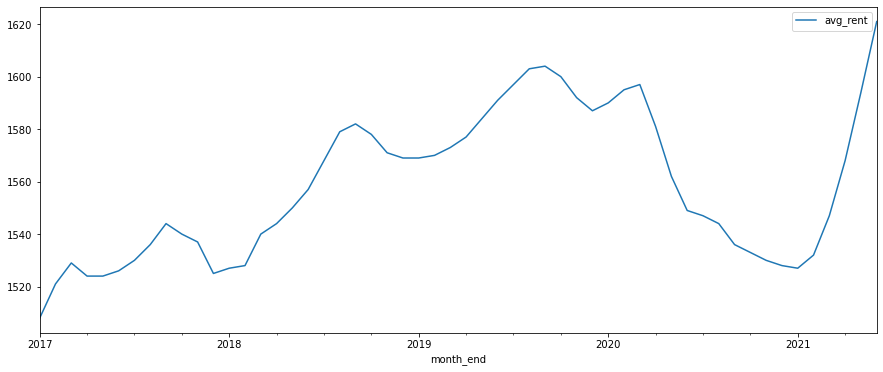

In [6]:
record.plot(figsize=(15, 6))

# price dips near beginning of the year? 

## Model Selection

In [7]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
# fit data on all parameter triplets to get AIC (goodness-of-fit with complexity consideration)

results_list = []
param_list = []
seasonal_param_list = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        param_list.append(param)
        seasonal_param_list.append(param_seasonal)
        try:
            mod = sm.tsa.statespace.SARIMAX(record,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            results_list.append(results.aic)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:931.7531492522497
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:680.0220923477856
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:420.9584069161699
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1100.5036184437395
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:431.5078884660696
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:413.6178456345466
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:313.41672173990185
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1045.1478535909484
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:917.5251810966648
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:615.6250373288691
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:367.76829421592595
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1829.278458295381
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:386.1576004420124
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:361.7571474260951
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:280.22303696682366
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1817.1090792296422
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:378.7921277516308
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:296.33248720230927
ARI

In [9]:
results_df = pd.DataFrame({'param':param_list
              , 'seasonal_param':seasonal_param_list
              , 'aic':results_list})
min_aic = results_df['aic'].min()
print(min_aic)

results_df

175.90214284313353


,param,seasonal_param,aic
0,"(0, 0, 0)","(0, 0, 0, 12)",931.753149
1,"(0, 0, 0)","(0, 0, 1, 12)",680.022092
2,"(0, 0, 0)","(0, 1, 0, 12)",420.958407
3,"(0, 0, 0)","(0, 1, 1, 12)",1100.503618
4,"(0, 0, 0)","(1, 0, 0, 12)",431.507888
5,"(0, 0, 0)","(1, 0, 1, 12)",413.617846
6,"(0, 0, 0)","(1, 1, 0, 12)",313.416722
7,"(0, 0, 0)","(1, 1, 1, 12)",1045.147854
8,"(0, 0, 1)","(0, 0, 0, 12)",917.525181
9,"(0, 0, 1)","(0, 0, 1, 12)",615.625037


In [10]:
# optimal option out of all the models considered
final_param = results_df.loc[results_df['aic'] == min_aic]['param'].values[0]
final_seasonal = results_df.loc[results_df['aic'] == min_aic]['seasonal_param'].values[0]


results_df.loc[results_df['aic'] == min_aic]

,param,seasonal_param,aic
63,"(1, 1, 1)","(1, 1, 1, 12)",175.902143


## Fit Final ARIMA Time Series Model

In [11]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=final_param,
                                seasonal_order=final_seasonal,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

# first two features have "significant" p-values (< or ~ 0.05)

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8265      0.166      4.974      0.000       0.501       1.152
ma.L1          0.4909      0.292      1.679      0.093      -0.082       1.064
ar.S.L12      -0.2788      0.230     -1.214      0.225      -0.729       0.171
ma.S.L12      -1.0000   1.39e+04   -7.2e-05      1.000   -2.72e+04    2.72e+04
sigma2        16.5533    2.3e+05    7.2e-05      1.000    -4.5e+05     4.5e+05


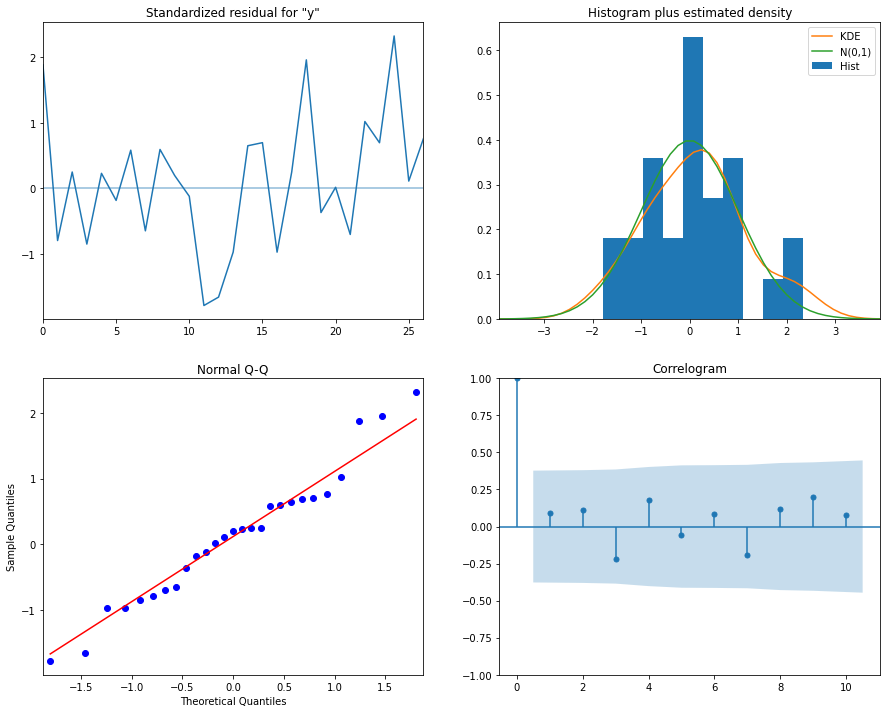

In [12]:
# run model diagnostics to ensure that none of the assumptions made by the model have been violated
results.plot_diagnostics(figsize=(15, 12))

plt.show() # add this line to avoid double plots



# histogram (top right)
    # we see that the orange KDE line follows closely with the standard normal N(0,1) line 
    # good indication that the residuals are normally distributed
# qq-plot (bottom left)
    # shows ordered distribution of residuals follow the linear samples taken from a standard normal distribution 
    # strong indication that the residuals are normally distributed
    

# residuals over time (top left) 
    # does not display any obvious seasonality and appears to be white noise
    # DOES THIS LOOK A PATTERN?????????
#  autocorrelation (bottom right)
    # time series residuals have low correlation with lagged versions of itself
    # < 0.5 correlations but > 0.25, is too much????????
    

### Validating Forecasts

In [13]:
# produce one-step ahead forecasts, (forecasts generated using the full history)
pred = results.get_prediction(dynamic=False) 
pred_ci = pred.conf_int()

pred_dynamic = results.get_prediction(dynamic=True) 
pred_ci_dynamic = pred_dynamic.conf_int()

In [14]:
y_forecasted = pred.predicted_mean

# Compute the mean square error
mse = ((y_forecasted - y) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

#### Note: Dynamic Forecasting has worse MSE ####
y_forecasted_dynamic = pred_dynamic.predicted_mean
mse_dynamic = ((y_forecasted_dynamic - y) ** 2).mean()
print('The Mean Squared Error of our dynamic forecasts is {}'.format(round(mse_dynamic, 2)))

The Mean Squared Error of our forecasts is 64084.35
The Mean Squared Error of our dynamic forecasts is 2430053.94


In [15]:
print(y)

print(y_forecasted)

print(pred_ci)

[1508. 1521. 1529. 1524. 1524. 1526. 1530. 1536. 1544. 1540. 1537. 1525.
 1527. 1528. 1540. 1544. 1550. 1557. 1568. 1579. 1582. 1578. 1571. 1569.
 1569. 1570. 1573. 1577. 1584. 1591. 1597. 1603. 1604. 1600. 1592. 1587.
 1590. 1595. 1597. 1581. 1562. 1549. 1547. 1544. 1536. 1533. 1530. 1528.
 1527. 1532. 1547. 1568. 1594. 1621.]
[   0.         1923.46071635 1667.21402638 1583.11207298 1540.23191798
 1529.59361125 1528.89144799 1532.92402549 1539.89904075 1549.19883813
 1539.86404162 1535.50746329 2361.16969659  998.39534342 1533.82783087
 1540.19039068 1550.05265164 1556.19140673 1564.28490041 1577.94101258
 1591.29174177 1583.02028248 1590.7475097  1600.51006472 1719.96576634
 1571.12440468 1578.07874262 1565.9449472  1588.59386978 1589.56047518
 1601.87629786 1601.67987178 1605.04658261 1596.6643401  1595.68697525
 1583.62554202 1588.88618052 1595.66320685 1606.09928954 1589.29539905
 1566.83949817 1545.75870182 1543.52512404 1548.83574567 1534.75652398
 1523.25416256 1531.82616347 15

In [16]:
# add forecasted rent and the confidence interval to record dataframe for graph purposes
record['forecasted_rent'] = y_forecasted
record['CI_low'] = pred_ci[:, 0]
record['CI_high'] = pred_ci[:, 1]

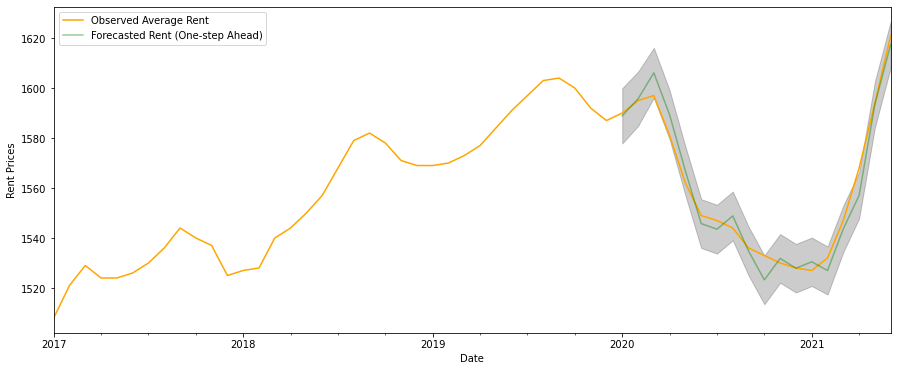

In [17]:
ax = record['avg_rent'].plot(label='Observed Average Rent', color = 'orange', figsize=(15, 6))
record['forecasted_rent']['2020':].plot(ax=ax, label='Forecasted Rent (One-step Ahead)', alpha=.4, color = "green")

ax.fill_between(record.index[-len(record['forecasted_rent']['2020':]):],
                pd.DataFrame.to_numpy(record['CI_low']['2020':]),
                pd.DataFrame.to_numpy(record['CI_high']['2020':]), 
                color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Rent Prices')
plt.legend(loc = 'upper left')

plt.show()